In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import sklearn

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('stroke.csv')


In [3]:
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [4]:
df.drop('id',axis=1,inplace=True)

In [5]:
df.describe()

age  hypertension  heart_disease  avg_glucose_level  \
count  5110.000000   5110.000000    5110.000000        5110.000000   
mean     43.226614      0.097456       0.054012         106.147677   
std      22.612647      0.296607       0.226063          45.283560   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.245000   
50%      45.000000      0.000000       0.000000          91.885000   
75%      61.000000      0.000000       0.000000         114.090000   
max      82.000000      1.000000       1.000000         271.740000   

               bmi       stroke  
count  4909.000000  5110.000000  
mean     28.893237     0.048728  
std       7.854067     0.215320  
min      10.300000     0.000000  
25%      23.500000     0.000000  
50%      28.100000     0.000000  
75%      33.100000     0.000000  
max      97.600000     1.000000

In [6]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [8]:
df_continuous = df[['age', 'avg_glucose_level', 'bmi']]

In [9]:
from pywaffle import Waffle

In [10]:
stroke_home = df[df['stroke'] == 1]['Residence_type'].value_counts()
healthy_home= df[df['stroke'] == 0]['Residence_type'].value_counts()

urban = df['Residence_type'].value_counts().values[0]
rural =  df['Residence_type'].value_counts().values[1]

stroke_urban = int(round (stroke_home.values[0] / urban * 100, 0))
stroke_rural= int(round( stroke_home.values[1] / rural *100, 0))
healthy_urban = int(round(healthy_home.values[0] / urban * 100, 0))
healthy_rural = int(round(healthy_home.values[1] / rural *100, 0))

urban_per = int(round(urban/(urban+rural) * 100, 0))
rural_per = int(round(rural/(urban+rural)* 100, 0))




fig = plt.figure(FigureClass = Waffle, 
                 constrained_layout = True,
                 figsize = (7,7),
                 facecolor = 'white',dpi = 2000,
                 
                 plots = {'121':
                          {     
                           'rows':7,
                           'columns': 7,
                           'values' : [stroke_urban,healthy_urban],
                            'colors' : ['#fe346e','#512b58'],
                              'vertical' : True,
                              'interval_ratio_x': 0.005,
                              'interval_ratio_y': 0.005,
                              'icons' : 'city',
                              'icon_legend': False,
                              'icon_size':15,
                              'plot_anchor':'C',
                              'alpha':0.8,
                              'starting_location': 'NE'
                          },
                          
                          '122' :
                          { 
                            'rows': 7,
                            'columns':7,
                            'values':[stroke_rural,healthy_rural],         
                              'colors' : ['#fe346e','#512b58'],
                              'vertical': True,
                              'interval_ratio_x': 0.005,
                              'interval_ratio_y':0.005,
                              'icons' : 'home',
                              'icon_legend' :False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.8,
                              'starting_location': 'NE'
                                                      
                           }
                         },
                   
)


fig.text(0., 0.85, 'Effect of residence location on strokes?', {'font':'Serif', 'size':20, 'color':'black', 'weight':'bold'})
fig.text(0., 0.79, 'Location of home does not have much of the effect on heart strokes of individuals.\nBoth rural and urban people have similar possibilities of Strokes.', {'font':'Serif', 'size':13, 'color':'black', 'weight':'normal'}, alpha =0.8)

fig.text(0.23, 0.28, '{}%'.format(healthy_urban), {'font':'Serif', 'size':20,'weight':'bold' ,'color':'#2c003e'},alpha = 1,)
fig.text(0.68, 0.28, '{}%'.format(healthy_rural), {'font':'Serif', 'size':20,'weight':'bold', 'color':'#2c003e'}, alpha = 1)
fig.text(0.13, 0.68, 'Urban Home({}%)'.format(urban_per), {'font':'Serif', 'size':16,'weight':'bold' ,'color':'black'},alpha = 0.5,)
fig.text(0.57, 0.68, "Rural Home({}%)".format(rural_per), {'font':'Serif', 'size':16,'weight':'bold', 'color':'black'}, alpha = 0.5)
#fig.text(0., 0.8, 'Assumption was proven wrong', {'font':'Serif', 'size':24, 'color':'black', 'weight':'bold'})

fig.text(0.88,0.75, 'Stroke ', {'font': 'Serif','weight':'bold','Size': '16','weight':'bold','style':'normal', 'color':'#fe346e'})
fig.text(1,0.75, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
fig.text(1.025,0.75, 'No Stroke', {'font': 'Serif','weight':'bold', 'Size': '16','style':'normal', 'weight':'bold','color':'#512b58'},alpha = 1)


fig.show()

In [11]:
stroke_gen = df[df['stroke'] == 1]['gender'].value_counts()
healthy_gen = df[df['stroke'] == 0]['gender'].value_counts()

female = df['gender'].value_counts().values[0]
male =  df['gender'].value_counts().values[1]

stroke_female = int(round (stroke_gen.values[0] / female * 100, 0))
stroke_male = int(round( stroke_gen.values[1] / male *100, 0))
healthy_female = int(round(healthy_gen.values[0] / female * 100, 0))
healthy_male = int(round(healthy_gen.values[1] / male *100, 0))

female_per = int(round(female/(female+male) * 100, 0))
male_per = int(round(male/(female+male)* 100, 0))



fig = plt.figure(FigureClass = Waffle, 
                 constrained_layout = True,
                 figsize = (7,7),
                 facecolor = 'white',dpi = 2000,
                 
                 plots = {'121':
                          {     
                           'rows':7,
                           'columns': 7,
                           'values' : [healthy_male,stroke_male],
                            'colors' : ['#512b58','#fe346e'],
                              'vertical' : True,
                              'interval_ratio_y': 0.1,
                              'interval_ratio_x': 0.1,
                              'icons' : 'male',
                              'icon_legend': False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.1
                          },
                          
                          '122' :
                          { 
                            'rows': 7,
                            'columns':7,
                            'values':[healthy_female,stroke_female],         
                              'colors' : ['#512b58','#fe346e'],
                              'vertical': True,
                              'interval_ratio_y': 0.1,
                              'interval_ratio_x': 0.1,
                              'icons' : 'female',
                              'icon_legend' :False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.1
                                                      
                           }
                         },
                   
)
#fig.text ('asdfasdfasd0', {'font':'Serif', 'size':35, 'color':'black'} )


fig.text(0., 0.8, 'Effect of gender on strokes?', {'font':'Serif', 'size':20, 'color':'black', 'weight':'bold'})
fig.text(0., 0.73, 'Risk of stroke in both male and female are same,\nGender does not have an effect on Stroke. ', {'font':'Serif', 'size':13, 'color':'black', 'weight':'normal'}, alpha = 0.7)
fig.text(0.24, 0.22, 'ooo', {'font':'Serif', 'size':16,'weight':'bold' ,'color':'#f6f5f5'})
fig.text(0.65, 0.22, 'ooo', {'font':'Serif', 'size':16,'weight':'bold', 'color':'#f6f5f5'})
fig.text(0.23, 0.28, '{}%'.format(healthy_male), {'font':'Serif', 'size':20,'weight':'bold' ,'color':'#512b58'},alpha = 1,)
fig.text(0.65, 0.28, '{}%'.format(healthy_female), {'font':'Serif', 'size':20,'weight':'bold', 'color':'#512b58'}, alpha = 1)
fig.text(0.21, 0.67, 'Male ({}%)'.format(male_per), {'font':'Serif', 'size':14,'weight':'bold' ,'color':'black'},alpha = 0.5,)
fig.text(0.61, 0.67, 'Female({}%)'.format(female_per), {'font':'Serif', 'size':14,'weight':'bold', 'color':'black'}, alpha = 0.5)
#fig.text(0., 0.8, 'Assumption was proven wrong', {'font':'Serif', 'size':24, 'color':'black', 'weight':'bold'})

fig.text(0.9,0.73, 'Stroke ', {'font': 'Serif','weight':'bold','Size': '16','weight':'bold','style':'normal', 'color':'#fe346e'})
fig.text(1.02,0.73, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
fig.text(1.035,0.73, 'No Stroke', {'font': 'Serif','weight':'bold', 'Size': '16','style':'normal', 'weight':'bold','color':'#512b58'},alpha = 1)


fig.show()

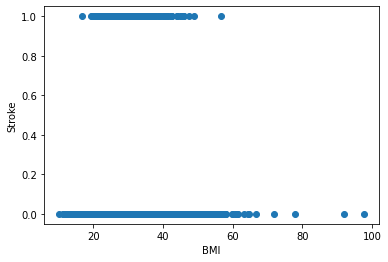

In [12]:
plt.scatter(df['bmi'], df['stroke'])

# add x and y axis labels
plt.xlabel('BMI')
plt.ylabel('Stroke')

# show the plot
plt.show()

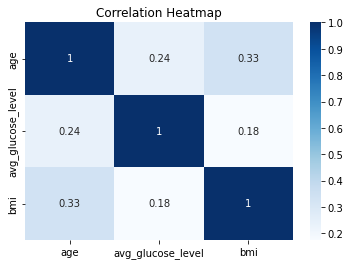

In [13]:
sns.heatmap(df_continuous.corr(), annot=True, cmap="Blues")
plt.title('Correlation Heatmap')
plt.show()

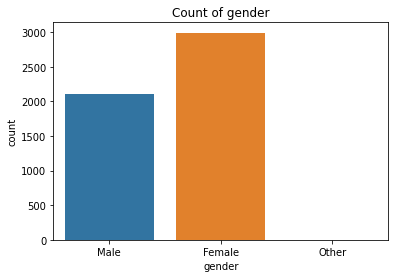

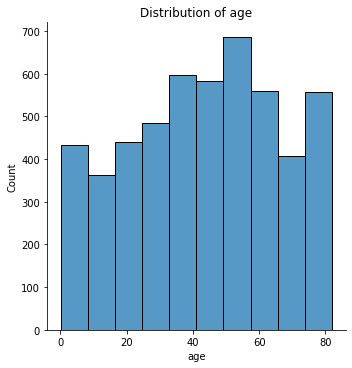

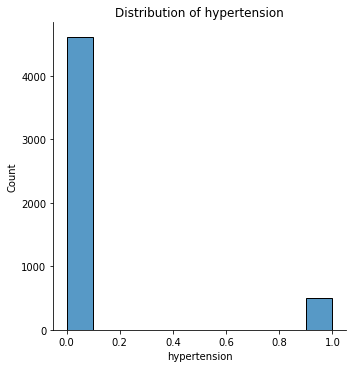

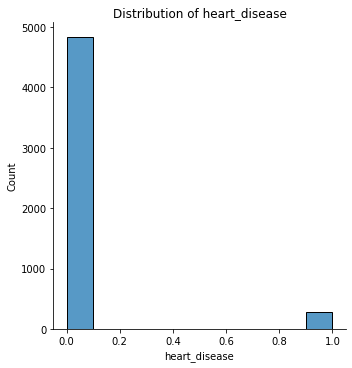

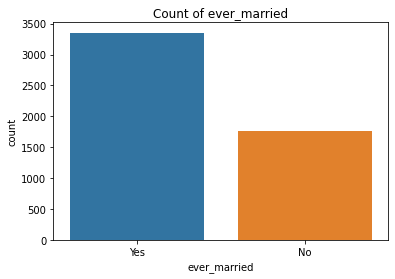

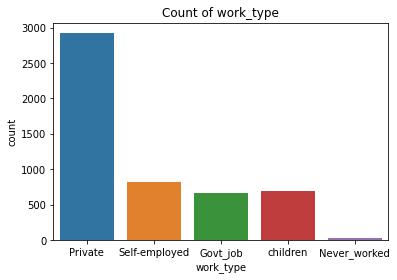

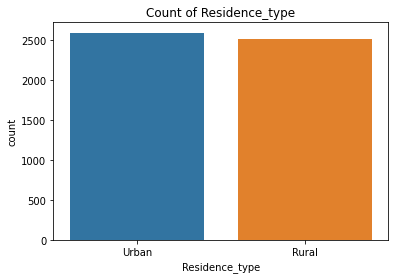

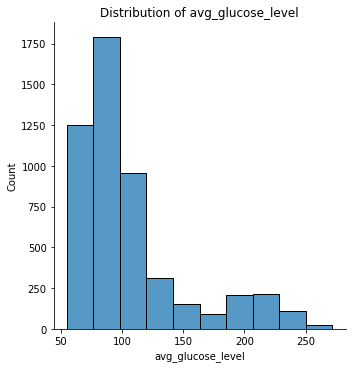

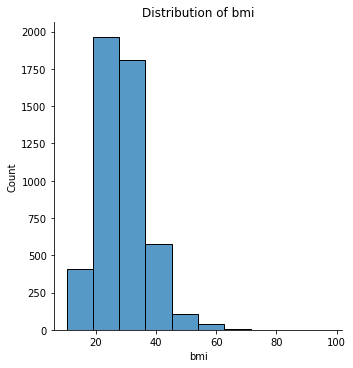

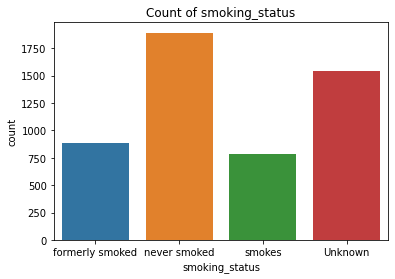

In [14]:
for column in df.columns:
    if column != 'stroke':
        if df[column].dtype != 'O':
            sns.displot(df[column], kde=False, bins=10)
            plt.title(f'Distribution of {column}')
            plt.show()
        else:
            sns.countplot(data=df, x=column)
            plt.title(f'Count of {column}')
            plt.show()

In [15]:
num_other_gender = df[df['gender'] == 'Other'].shape[0]

# Print the number of rows where the gender is 'Other'
print(f'The number of rows where the gender is Other is {num_other_gender}')




The number of rows where the gender is Other is 1


In [16]:
#remove gender = other 
df =df[df['gender'] != 'Other']


In [17]:
df.reset_index(drop= True, inplace=True)


In [18]:
bmi_mean = df['bmi'].mean()
print(bmi_mean)

stroke_mean_bmi = df.loc[df['stroke'] == 1, 'bmi'].mean()
print(stroke_mean_bmi)

nonstroke_mean_bmi = df.loc[df['stroke'] == 0, 'bmi'].mean()
print(nonstroke_mean_bmi)

df.loc[(df['stroke'] == 1) & (df['bmi'].isnull()), 'bmi'] = stroke_mean_bmi
df.loc[(df['stroke'] == 0) & (df['bmi'].isnull()), 'bmi'] = nonstroke_mean_bmi

df.isnull().sum()

28.894559902200488
30.471291866028707
28.82443072994254


gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

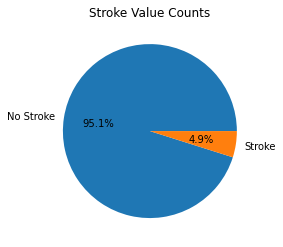

In [19]:
# Plot a pie chart of stroke values before removing unknown smokers
stroke_counts = df['stroke'].value_counts()
plt.pie(stroke_counts, labels=['No Stroke', 'Stroke'], autopct='%1.1f%%')
plt.title('Stroke Value Counts')
plt.show()

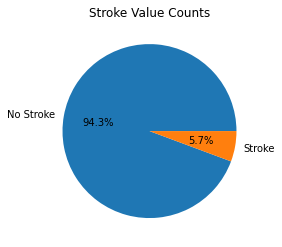

gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1     Female  61.0             0              0          Yes  Self-employed   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
5101  Female  57.0             0              0          Yes        Private   
5104  Female  80.0             1              0          Yes        Private   
5105  Female  81.0             0              0          Yes  Self-employed   
5106  Female  35.0             0              0          Yes  Self-employed   
5107    Male  51.0             0              0          Yes        Private   

     Residence_type  avg_glucose_level        bmi   smoking_status  stroke  
0             Urban             228.69  36.600000  formerly smoked       1  
1             Rural             202.21  30.471292     never smoked       1  
2             Rural             105.92  32.500000     never smoked       1  
3             Urban             171.23  34.400000           smokes       1  
4             Rural             174.12  24.000000     never smoked       1  
...             ...                ...        ...              ...     ...  
5101          Rural              77.93  21.700000     never smoked       0  
5104          Urban              83.75  28.824431     never smoked       0  
5105          Urban             125.20  40.000000     never smoked       0  
5106          Rural              82.99  30.600000     never smoked       0  
5107          Rural             166.29  25.600000  formerly smoked       0  

[3565 rows x 11 columns]

In [20]:
# Removing unknown smokers
df= df[df['smoking_status'] != 'Unknown']
stroke_counts = df['stroke'].value_counts()

# Plot a pie chart of stroke values
plt.pie(stroke_counts, labels=['No Stroke', 'Stroke'], autopct='%1.1f%%')
plt.title('Stroke Value Counts')
plt.show()
df

In [21]:
df

gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1     Female  61.0             0              0          Yes  Self-employed   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
5101  Female  57.0             0              0          Yes        Private   
5104  Female  80.0             1              0          Yes        Private   
5105  Female  81.0             0              0          Yes  Self-employed   
5106  Female  35.0             0              0          Yes  Self-employed   
5107    Male  51.0             0              0          Yes        Private   

     Residence_type  avg_glucose_level        bmi   smoking_status  stroke  
0             Urban             228.69  36.600000  formerly smoked       1  
1             Rural             202.21  30.471292     never smoked       1  
2             Rural             105.92  32.500000     never smoked       1  
3             Urban             171.23  34.400000           smokes       1  
4             Rural             174.12  24.000000     never smoked       1  
...             ...                ...        ...              ...     ...  
5101          Rural              77.93  21.700000     never smoked       0  
5104          Urban              83.75  28.824431     never smoked       0  
5105          Urban             125.20  40.000000     never smoked       0  
5106          Rural              82.99  30.600000     never smoked       0  
5107          Rural             166.29  25.600000  formerly smoked       0  

[3565 rows x 11 columns]

In [22]:
#Crossing age and bmi due to moderate correlation to capture any interactions
df['age_bmi'] = df['age'] * df['bmi']

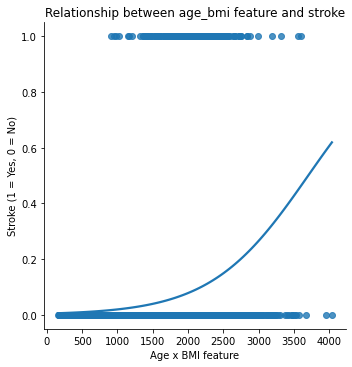

In [23]:
sns.lmplot(x="age_bmi", y="stroke", data=df, logistic=True, ci=None)
plt.title("Relationship between age_bmi feature and stroke")
plt.xlabel("Age x BMI feature")
plt.ylabel("Stroke (1 = Yes, 0 = No)")
plt.show()

In [24]:
df

gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1     Female  61.0             0              0          Yes  Self-employed   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
5101  Female  57.0             0              0          Yes        Private   
5104  Female  80.0             1              0          Yes        Private   
5105  Female  81.0             0              0          Yes  Self-employed   
5106  Female  35.0             0              0          Yes  Self-employed   
5107    Male  51.0             0              0          Yes        Private   

     Residence_type  avg_glucose_level        bmi   smoking_status  stroke  \
0             Urban             228.69  36.600000  formerly smoked       1   
1             Rural             202.21  30.471292     never smoked       1   
2             Rural             105.92  32.500000     never smoked       1   
3             Urban             171.23  34.400000           smokes       1   
4             Rural             174.12  24.000000     never smoked       1   
...             ...                ...        ...              ...     ...   
5101          Rural              77.93  21.700000     never smoked       0   
5104          Urban              83.75  28.824431     never smoked       0   
5105          Urban             125.20  40.000000     never smoked       0   
5106          Rural              82.99  30.600000     never smoked       0   
5107          Rural             166.29  25.600000  formerly smoked       0   

          age_bmi  
0     2452.200000  
1     1858.748804  
2     2600.000000  
3     1685.600000  
4     1896.000000  
...           ...  
5101  1236.900000  
5104  2305.954458  
5105  3240.000000  
5106  1071.000000  
5107  1305.600000  

[3565 rows x 12 columns]

In [25]:
df.reset_index(inplace=True)
df


index  gender   age  hypertension  heart_disease ever_married  \
0         0    Male  67.0             0              1          Yes   
1         1  Female  61.0             0              0          Yes   
2         2    Male  80.0             0              1          Yes   
3         3  Female  49.0             0              0          Yes   
4         4  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
3560   5101  Female  57.0             0              0          Yes   
3561   5104  Female  80.0             1              0          Yes   
3562   5105  Female  81.0             0              0          Yes   
3563   5106  Female  35.0             0              0          Yes   
3564   5107    Male  51.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level        bmi  \
0           Private          Urban             228.69  36.600000   
1     Self-employed          Rural             202.21  30.471292   
2           Private          Rural             105.92  32.500000   
3           Private          Urban             171.23  34.400000   
4     Self-employed          Rural             174.12  24.000000   
...             ...            ...                ...        ...   
3560        Private          Rural              77.93  21.700000   
3561        Private          Urban              83.75  28.824431   
3562  Self-employed          Urban             125.20  40.000000   
3563  Self-employed          Rural              82.99  30.600000   
3564        Private          Rural             166.29  25.600000   

       smoking_status  stroke      age_bmi  
0     formerly smoked       1  2452.200000  
1        never smoked       1  1858.748804  
2        never smoked       1  2600.000000  
3              smokes       1  1685.600000  
4        never smoked       1  1896.000000  
...               ...     ...          ...  
3560     never smoked       0  1236.900000  
3561     never smoked       0  2305.954458  
3562     never smoked       0  3240.000000  
3563     never smoked       0  1071.000000  
3564  formerly smoked       0  1305.600000  

[3565 rows x 13 columns]

In [26]:
df.drop('index',axis=1,inplace=True)
df

gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1     Female  61.0             0              0          Yes  Self-employed   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
3560  Female  57.0             0              0          Yes        Private   
3561  Female  80.0             1              0          Yes        Private   
3562  Female  81.0             0              0          Yes  Self-employed   
3563  Female  35.0             0              0          Yes  Self-employed   
3564    Male  51.0             0              0          Yes        Private   

     Residence_type  avg_glucose_level        bmi   smoking_status  stroke  \
0             Urban             228.69  36.600000  formerly smoked       1   
1             Rural             202.21  30.471292     never smoked       1   
2             Rural             105.92  32.500000     never smoked       1   
3             Urban             171.23  34.400000           smokes       1   
4             Rural             174.12  24.000000     never smoked       1   
...             ...                ...        ...              ...     ...   
3560          Rural              77.93  21.700000     never smoked       0   
3561          Urban              83.75  28.824431     never smoked       0   
3562          Urban             125.20  40.000000     never smoked       0   
3563          Rural              82.99  30.600000     never smoked       0   
3564          Rural             166.29  25.600000  formerly smoked       0   

          age_bmi  
0     2452.200000  
1     1858.748804  
2     2600.000000  
3     1685.600000  
4     1896.000000  
...           ...  
3560  1236.900000  
3561  2305.954458  
3562  3240.000000  
3563  1071.000000  
3564  1305.600000  

[3565 rows x 12 columns]

## Chi-Squared Statistic
We conduct the Pearson's Chi-Squared Statistic to test for independence between categorical variables. This is to conclude whether two variables (categorical and the target variable stroke) are related to each other. Null Hypothesis (H0): There is no relationship between the variables Alternative Hypothesis (H1): There is a statistically significant relationship between the variables.


In [27]:
#pip install stats

In [28]:
from scipy import stats
chi_table = pd.DataFrame(columns=["Category", "P-Value",'Chi Square Test Stat', "Conclusion"])
def find_dep(p_value): 
    alpha = 0.05
    if p_value <= alpha: 
        return "Dependent (reject H0)"
    else: 
        return "Independent(Do not reject H0)"
## get the 
cat_variables = ["gender", "hypertension", "heart_disease", "ever_married", "work_type","Residence_type","smoking_status"]
chi_lists = []

for column in cat_variables:
    contigency = pd.crosstab(df[column], df['stroke'])
    stat, p_value, dof, expected = stats.chi2_contingency(contigency)
    conclusion = find_dep(p_value)
    each_col = [column, p_value, stat, conclusion]
    chi_lists.append(each_col)

for i in chi_lists:
    chi_table.loc[len(chi_table)] = i
chi_table

Category       P-Value  Chi Square Test Stat  \
0          gender  3.919168e-01              0.732987   
1    hypertension  2.141984e-15             62.929876   
2   heart_disease  3.620020e-14             57.364946   
3    ever_married  4.838049e-06             20.900355   
4       work_type  1.648351e-03             17.355633   
5  Residence_type  6.939923e-01              0.154797   
6  smoking_status  3.197753e-03             11.490614   

                      Conclusion  
0  Independent(Do not reject H0)  
1          Dependent (reject H0)  
2          Dependent (reject H0)  
3          Dependent (reject H0)  
4          Dependent (reject H0)  
5  Independent(Do not reject H0)  
6          Dependent (reject H0)

In [29]:
#pip install imbalanced-learn

## Point Biserial Correlation
Point-biserial correlation is used to measure the relationship between a binary variable, x, and a continuous variable, y. We use this correlation strategy to see the level of correlation between the continuous variables and the target variable, stroke

In [30]:
biser_table = pd.DataFrame(columns=["Category", "Biserial Stats",'P_value', "Conclusion"])
cont_var = ["age", "bmi","avg_glucose_level", "age_bmi"]
bi_lists = []
for var in cont_var:
   stat, p = stats.pointbiserialr(df[var], df["stroke"])
   each_val = [var, stat, p, find_dep(p)]
   bi_lists.append(each_val)

for i in bi_lists:
    biser_table.loc[len(biser_table)] = i
biser_table

Category  Biserial Stats       P_value  \
0                age        0.250765  2.989889e-52   
1                bmi        0.013262  4.286100e-01   
2  avg_glucose_level        0.128773  1.179848e-14   
3            age_bmi        0.215296  1.175359e-38   

                      Conclusion  
0          Dependent (reject H0)  
1  Independent(Do not reject H0)  
2          Dependent (reject H0)  
3          Dependent (reject H0)

In [31]:
#removing residence_type
to_drop = ['Residence_type','gender','bmi']
df2= df.drop(to_drop, axis=1)
df2


age  hypertension  heart_disease ever_married      work_type  \
0     67.0             0              1          Yes        Private   
1     61.0             0              0          Yes  Self-employed   
2     80.0             0              1          Yes        Private   
3     49.0             0              0          Yes        Private   
4     79.0             1              0          Yes  Self-employed   
...    ...           ...            ...          ...            ...   
3560  57.0             0              0          Yes        Private   
3561  80.0             1              0          Yes        Private   
3562  81.0             0              0          Yes  Self-employed   
3563  35.0             0              0          Yes  Self-employed   
3564  51.0             0              0          Yes        Private   

      avg_glucose_level   smoking_status  stroke      age_bmi  
0                228.69  formerly smoked       1  2452.200000  
1                202.21     never smoked       1  1858.748804  
2                105.92     never smoked       1  2600.000000  
3                171.23           smokes       1  1685.600000  
4                174.12     never smoked       1  1896.000000  
...                 ...              ...     ...          ...  
3560              77.93     never smoked       0  1236.900000  
3561              83.75     never smoked       0  2305.954458  
3562             125.20     never smoked       0  3240.000000  
3563              82.99     never smoked       0  1071.000000  
3564             166.29  formerly smoked       0  1305.600000  

[3565 rows x 9 columns]

In [32]:
from sklearn.preprocessing import OneHotEncoder

In [33]:
#Performing standardization on continuous variables
from sklearn.preprocessing import StandardScaler

# Fit the StandardScaler to the training data
scaler = StandardScaler()
df[['age', 'avg_glucose_level', 'bmi', 'age_bmi']] = scaler.fit_transform(df[['age', 'avg_glucose_level', 'bmi', 'age_bmi']])

In [34]:
#Performing standardization on continuous variables for date frame 2
from sklearn.preprocessing import StandardScaler

# Fit the StandardScaler to the training data
scaler = StandardScaler()
df2[['age', 'avg_glucose_level', 'age_bmi']] = scaler.fit_transform(df[['age', 'avg_glucose_level', 'age_bmi']])

In [35]:
df = pd.get_dummies(df, columns = ['gender','ever_married','work_type','Residence_type','smoking_status'])

In [36]:
df2 = pd.get_dummies(df2, columns = ['ever_married','work_type','smoking_status'])

## Hypothesis Testing

At the 0.05 significant level, all the variables are statistically significant since the p-value < 0.05

In [37]:
#pip install xgboost

In [38]:
import xgboost
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import  pyplot
from sklearn.model_selection import train_test_split

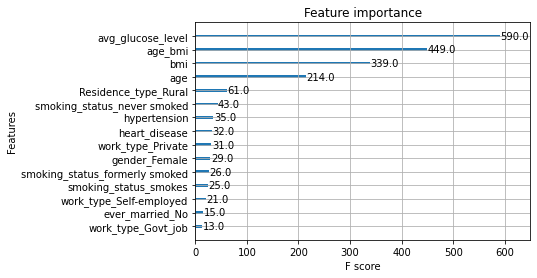

In [39]:
np.random.seed(120)
y_feature_selection = df['stroke'] # dependent variable
x_feature_selection = df.drop(columns=["stroke"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(x_feature_selection, y_feature_selection, test_size=0.33, random_state=7)
model = XGBClassifier()
model.fit(x_feature_selection, y_feature_selection)
# plot feature importance
plot_importance(model)
plt.show()




# Removing Residence Type

In [40]:
df

age  hypertension  heart_disease  avg_glucose_level       bmi  \
0     0.961273             0              1           2.479202  0.888223   
1     0.643316             0              0           1.930834  0.031646   
2     1.650179             0              1          -0.063211  0.315188   
3     0.007403             0              0           1.289277  0.580741   
4     1.597186             1              0           1.349126 -0.872812   
...        ...           ...            ...                ...       ...   
3560  0.431345             0              0          -0.642849 -1.194270   
3561  1.650179             1              0          -0.522324 -0.198527   
3562  1.703172             0              0           0.336054  1.363423   
3563 -0.734496             0              0          -0.538062  0.049635   
3564  0.113388             0              0           1.186976 -0.649188   

      stroke   age_bmi  gender_Female  gender_Male  ever_married_No  ...  \
0          1  1.458603              0            1                0  ...   
1          1  0.560702              1            0                0  ...   
2          1  1.682227              0            1                0  ...   
3          1  0.298726              1            0                0  ...   
4          1  0.617064              1            0                0  ...   
...      ...       ...            ...          ...              ...  ...   
3560       0 -0.380165              1            0                0  ...   
3561       0  1.237332              1            0                0  ...   
3562       0  2.650557              1            0                0  ...   
3563       0 -0.631174              1            0                0  ...   
3564       0 -0.276220              0            1                0  ...   

      work_type_Govt_job  work_type_Never_worked  work_type_Private  \
0                      0                       0                  1   
1                      0                       0                  0   
2                      0                       0                  1   
3                      0                       0                  1   
4                      0                       0                  0   
...                  ...                     ...                ...   
3560                   0                       0                  1   
3561                   0                       0                  1   
3562                   0                       0                  0   
3563                   0                       0                  0   
3564                   0                       0                  1   

      work_type_Self-employed  work_type_children  Residence_type_Rural  \
0                           0                   0                     0   
1                           1                   0                     1   
2                           0                   0                     1   
3                           0                   0                     0   
4                           1                   0                     1   
...                       ...                 ...                   ...   
3560                        0                   0                     1   
3561                        0                   0                     0   
3562                        1                   0                     0   
3563                        1                   0                     1   
3564                        0                   0                     1   

      Residence_type_Urban  smoking_status_formerly smoked  \
0                        1                               1   
1                        0                               0   
2                        0                               0   
3                        1                               0   
4                        0                               0   
...                    ...                             ... 

In [41]:
df2

age  hypertension  heart_disease  avg_glucose_level  stroke  \
0     0.961273             0              1           2.479202       1   
1     0.643316             0              0           1.930834       1   
2     1.650179             0              1          -0.063211       1   
3     0.007403             0              0           1.289277       1   
4     1.597186             1              0           1.349126       1   
...        ...           ...            ...                ...     ...   
3560  0.431345             0              0          -0.642849       0   
3561  1.650179             1              0          -0.522324       0   
3562  1.703172             0              0           0.336054       0   
3563 -0.734496             0              0          -0.538062       0   
3564  0.113388             0              0           1.186976       0   

       age_bmi  ever_married_No  ever_married_Yes  work_type_Govt_job  \
0     1.458603                0                 1                   0   
1     0.560702                0                 1                   0   
2     1.682227                0                 1                   0   
3     0.298726                0                 1                   0   
4     0.617064                0                 1                   0   
...        ...              ...               ...                 ...   
3560 -0.380165                0                 1                   0   
3561  1.237332                0                 1                   0   
3562  2.650557                0                 1                   0   
3563 -0.631174                0                 1                   0   
3564 -0.276220                0                 1                   0   

      work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                          0                  1                        0   
1                          0                  0                        1   
2                          0                  1                        0   
3                          0                  1                        0   
4                          0                  0                        1   
...                      ...                ...                      ...   
3560                       0                  1                        0   
3561                       0                  1                        0   
3562                       0                  0                        1   
3563                       0                  0                        1   
3564                       0                  1                        0   

      work_type_children  smoking_status_formerly smoked  \
0                      0                               1   
1                      0                               0   
2                      0                               0   
3                      0                               0   
4                      0                               0   
...                  ...                             ...   
3560                   0                               0   
3561                   0                               0   
3562                   0                               0   
3563                   0                               0   
3564                   0                               1   

      smoking_status_never smoked  smoking_status_smokes  
0                               0                      0  
1                               1                      0  
2                               1                      0  
3                               0                      1  
4                               1                      0  
...                           ...                    ...  
3560                            1                      0  
3561                            1                      0  
3562                            1                      0  
3563                 

In [42]:
from sklearn.model_selection import train_test_split
X = df.drop('stroke', axis=1)
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=109)

X_df2 = df2.drop('stroke', axis=1)
y_df2 = df2['stroke']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_df2, y_df2, test_size=0.3, random_state=109)




In [43]:
#for original data set
from copy import deepcopy
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE object
smote = SMOTE(random_state = 42, sampling_strategy = 0.5)

# Resample the data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Print the number of samples in each class before and after resampling
print(f"Before resampling: \n{y_train.value_counts()}")
print(f"After resampling: \n{y_resampled.value_counts()}")

Before resampling: 
0    2339
1     156
Name: stroke, dtype: int64
After resampling: 
0    2339
1    1169
Name: stroke, dtype: int64


In [44]:
# for dataset without Residence Type
from copy import deepcopy
from imblearn.over_sampling import SMOTE


# Instantiate SMOTE object
smote2 = SMOTE(random_state = 42, sampling_strategy = 0.5)

# Resample the data
X_resampled2, y_resampled2 = smote2.fit_resample(X_train2, y_train2)

# Print the number of samples in each class before and after resampling
print(f"Before resampling: \n{y_train2.value_counts()}")
print(f"After resampling: \n{y_resampled2.value_counts()}")

Before resampling: 
0    2339
1     156
Name: stroke, dtype: int64
After resampling: 
0    2339
1    1169
Name: stroke, dtype: int64


In [45]:
X_train

age  hypertension  heart_disease  avg_glucose_level       bmi  \
2319 -0.840482             0              0          -0.514454 -0.551353   
3418  0.378352             1              0           1.420364 -0.020247   
2816 -0.363547             0              0           0.198341  2.229963   
1096  1.173244             0              0          -0.011232  0.357117   
2481  0.113388             0              0          -0.688408  0.063611   
...        ...           ...            ...                ...       ...   
2635  0.272367             0              0          -0.700212  1.083893   
2447  0.961273             0              0           2.688153  0.762435   
141   0.590323             0              0          -0.239028 -0.537376   
3317  0.113388             0              0          -0.876029 -0.104106   
3334 -0.363547             0              0          -1.048326 -0.830882   

       age_bmi  gender_Female  gender_Male  ever_married_No  ever_married_Yes  \
2319 -0.938467              1            0                0                 1   
3418  0.298726              1            0                0                 1   
2816  0.684242              1            0                1                 0   
1096  1.271897              0            1                0                 1   
2481  0.117315              0            1                0                 1   
...        ...            ...          ...              ...               ...   
2635  0.853094              1            0                0                 1   
2447  1.367368              0            1                0                 1   
141   0.145003              1            0                0                 1   
3317  0.024718              1            0                1                 0   
3334 -0.707430              0            1                0                 1   

      work_type_Govt_job  work_type_Never_worked  work_type_Private  \
2319                   0                       0                  1   
3418                   0                       0                  1   
2816                   0                       0                  1   
1096                   0                       0                  1   
2481                   0                       0                  0   
...                  ...                     ...                ...   
2635                   0                       0                  1   
2447                   0                       0                  1   
141                    0                       0                  1   
3317                   0                       0                  1   
3334                   1                       0                  0   

      work_type_Self-employed  work_type_children  Residence_type_Rural  \
2319                        0                   0                     1   
3418                        0                   0                     1   
2816                        0                   0                     1   
1096                        0                   0                     0   
2481                        1                   0                     0   
...                       ...                 ...                   ...   
2635                        0                   0                     0   
2447                        0                   0                     0   
141                         0                   0                     0   
3317                        0                   0                     1   
3334                        0                   0                     0   

      Residence_type_Urban  smoking_status_formerly smoked  \
2319                     0                               0   
3418                     0                               0   
2816                     0                               0   
1096                     1                               0   
2481                     1                               0   

In [46]:
X_train2

age  hypertension  heart_disease  avg_glucose_level   age_bmi  \
2319 -0.840482             0              0          -0.514454 -0.938467   
3418  0.378352             1              0           1.420364  0.298726   
2816 -0.363547             0              0           0.198341  0.684242   
1096  1.173244             0              0          -0.011232  1.271897   
2481  0.113388             0              0          -0.688408  0.117315   
...        ...           ...            ...                ...       ...   
2635  0.272367             0              0          -0.700212  0.853094   
2447  0.961273             0              0           2.688153  1.367368   
141   0.590323             0              0          -0.239028  0.145003   
3317  0.113388             0              0          -0.876029  0.024718   
3334 -0.363547             0              0          -1.048326 -0.707430   

      ever_married_No  ever_married_Yes  work_type_Govt_job  \
2319                0                 1                   0   
3418                0                 1                   0   
2816                1                 0                   0   
1096                0                 1                   0   
2481                0                 1                   0   
...               ...               ...                 ...   
2635                0                 1                   0   
2447                0                 1                   0   
141                 0                 1                   0   
3317                1                 0                   0   
3334                0                 1                   1   

      work_type_Never_worked  work_type_Private  work_type_Self-employed  \
2319                       0                  1                        0   
3418                       0                  1                        0   
2816                       0                  1                        0   
1096                       0                  1                        0   
2481                       0                  0                        1   
...                      ...                ...                      ...   
2635                       0                  1                        0   
2447                       0                  1                        0   
141                        0                  1                        0   
3317                       0                  1                        0   
3334                       0                  0                        0   

      work_type_children  smoking_status_formerly smoked  \
2319                   0                               0   
3418                   0                               0   
2816                   0                               0   
1096                   0                               0   
2481                   0                               0   
...                  ...                             ...   
2635                   0                               0   
2447                   0                               1   
141                    0                               0   
3317                   0                               0   
3334                   0                               0   

      smoking_status_never smoked  smoking_status_smokes  
2319                            1                      0  
3418                            1                      0  
2816                            0                      1  
1096                            0                      1  
2481                            1                      0  
...                           ...                    ...  
2635                            1                      0  
2447                            0                      0  
141                             0                      1  
3317                            1                      0  
3334                            1                      0  

In [47]:
import xgboost
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import  pyplot
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline


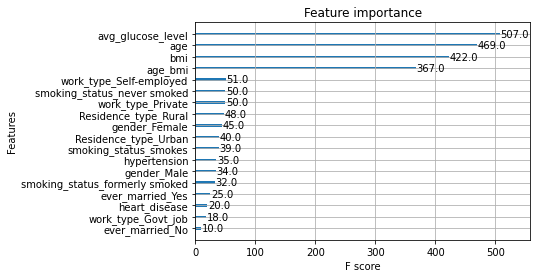

In [48]:
model = XGBClassifier()
model.fit(X_resampled, y_resampled)

plot_importance(model)
pyplot.show()

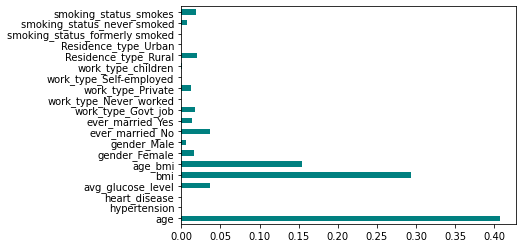

In [49]:
importances = mutual_info_classif(X_resampled, y_resampled)

feat_importances = pd.Series(importances, X_resampled.columns)
feat_importances.plot(kind='barh', color = 'teal')
plt.show()

# Logistic Regression

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [51]:
X_resampled

age  hypertension  heart_disease  avg_glucose_level       bmi  \
0    -0.840482             0              0          -0.514454 -0.551353   
1     0.378352             1              0           1.420364 -0.020247   
2    -0.363547             0              0           0.198341  2.229963   
3     1.173244             0              0          -0.011232  0.357117   
4     0.113388             0              0          -0.688408  0.063611   
...        ...           ...            ...                ...       ...   
3503  1.179594             0              0          -0.325995 -1.037566   
3504 -0.532131             0              0          -0.536489 -0.609622   
3505  1.322002             0              0          -0.487491 -0.692953   
3506  0.861353             0              0           2.012053  2.206810   
3507  1.311829             0              0          -0.618202  0.516257   

       age_bmi  gender_Female  gender_Male  ever_married_No  ever_married_Yes  \
0    -0.938467              1            0                0                 1   
1     0.298726              1            0                0                 1   
2     0.684242              1            0                1                 0   
3     1.271897              0            1                0                 1   
4     0.117315              0            1                0                 1   
...        ...            ...          ...              ...               ...   
3503  0.204323              1            0                1                 0   
3504 -0.730896              1            0                0                 0   
3505  0.553725              0            0                0                 1   
3506  2.283907              1            0                0                 1   
3507  1.526138              1            0                0                 1   

      work_type_Govt_job  work_type_Never_worked  work_type_Private  \
0                      0                       0                  1   
1                      0                       0                  1   
2                      0                       0                  1   
3                      0                       0                  1   
4                      0                       0                  0   
...                  ...                     ...                ...   
3503                   0                       0                  1   
3504                   0                       0                  0   
3505                   0                       0                  1   
3506                   0                       0                  1   
3507                   0                       0                  0   

      work_type_Self-employed  work_type_children  Residence_type_Rural  \
0                           0                   0                     1   
1                           0                   0                     1   
2                           0                   0                     1   
3                           0                   0                     0   
4                           1                   0                     0   
...                       ...                 ...                   ...   
3503                        0                   0                     0   
3504                        0                   0                     0   
3505                        0                   0                     1   
3506                        0                   0                     0   
3507                        1                   0                     0   

      Residence_type_Urban  smoking_status_formerly smoked  \
0                        0                               0   
1                        0                               0   
2                        0                               0   
3                        1                               0   
4                        1                               0   

In [52]:
X_resampled2

age  hypertension  heart_disease  avg_glucose_level   age_bmi  \
0    -0.840482             0              0          -0.514454 -0.938467   
1     0.378352             1              0           1.420364  0.298726   
2    -0.363547             0              0           0.198341  0.684242   
3     1.173244             0              0          -0.011232  1.271897   
4     0.113388             0              0          -0.688408  0.117315   
...        ...           ...            ...                ...       ...   
3503  0.966156             0              0          -0.324678  0.351508   
3504 -0.575518             0              0          -0.227739 -0.567121   
3505  1.612560             0              0          -0.583404  0.839687   
3506  0.844368             0              0           1.994791  2.247100   
3507  1.336278             0              0          -0.769672  1.598318   

      ever_married_No  ever_married_Yes  work_type_Govt_job  \
0                   0                 1                   0   
1                   0                 1                   0   
2                   1                 0                   0   
3                   0                 1                   0   
4                   0                 1                   0   
...               ...               ...                 ...   
3503                1                 0                   0   
3504                0                 0                   0   
3505                0                 1                   0   
3506                0                 1                   0   
3507                0                 1                   0   

      work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                          0                  1                        0   
1                          0                  1                        0   
2                          0                  1                        0   
3                          0                  1                        0   
4                          0                  0                        1   
...                      ...                ...                      ...   
3503                       0                  1                        0   
3504                       0                  0                        0   
3505                       0                  1                        0   
3506                       0                  1                        0   
3507                       0                  0                        1   

      work_type_children  smoking_status_formerly smoked  \
0                      0                               0   
1                      0                               0   
2                      0                               0   
3                      0                               0   
4                      0                               0   
...                  ...                             ...   
3503                   0                               0   
3504                   0                               1   
3505                   0                               1   
3506                   0                               1   
3507                   0                               0   

      smoking_status_never smoked  smoking_status_smokes  
0                               1                      0  
1                               1                      0  
2                               0                      1  
3                               0                      1  
4                               1                      0  
...                           ...                    ...  
3503                            1                      0  
3504                            0                      0  
3505                            0                      0  
3506                            0                      0  
3507                            1                      0  

In [53]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5,scoring = 'f1')
grid_search.fit(X_resampled, y_resampled)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'C': 10, 'penalty': 'l2'}


In [54]:
logreg = LogisticRegression(**best_params)
# Fit the logistic regression model to the entire training set
logreg.fit(X_resampled, y_resampled)
y_pred_logreg= logreg.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("F1:", f1_score(y_test, y_pred_logreg))
print("Precision:", precision_score(y_test, y_pred_logreg))
print("Recall:", recall_score(y_test, y_pred_logreg))
print("Roc Auc Score:", roc_auc_score(y_test, y_pred_logreg))



Accuracy: 0.9205607476635514
F1: 0.19047619047619047
Precision: 0.1694915254237288
Recall: 0.21739130434782608
Roc Auc Score: 0.5847698709239131


+--------------------------------+----------------------+
|          Feature Name          |     Coefficient      |
+--------------------------------+----------------------+
|              age               |  1.2547877832387557  |
|          hypertension          | -0.49197843332171465 |
|         heart_disease          | -0.25404497690732597 |
|       avg_glucose_level        |  0.2634887016773859  |
|              bmi               | -0.19269536744573937 |
|            age_bmi             |  0.4677932703446362  |
|         gender_Female          |  -5.614178664327877  |
|          gender_Male           |  -5.819921390566978  |
|        ever_married_No         |  -5.412100614840089  |
|        ever_married_Yes        |  -4.605000283215842  |
|       work_type_Govt_job       |  -6.002001162293365  |
|     work_type_Never_worked     | -2.6161673835953527  |
|       work_type_Private        |  -5.17194959916434   |
|    work_type_Self-employed     |  -5.860343340517614  |
|       work_t

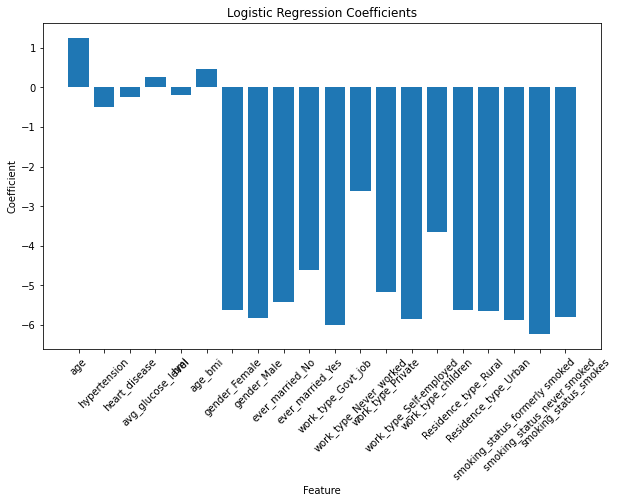

In [55]:
feature_names = X_resampled.columns
coefficients = logreg.coef_[0]
from prettytable import PrettyTable


table = PrettyTable()
table.field_names = ['Feature Name', 'Coefficient']
for feature, coef in zip(feature_names, coefficients):
    table.add_row([feature, coef])

# Print the table
print(table)

plt.figure(figsize=(10, 6))
plt.bar(feature_names, coefficients)
plt.xticks(feature_names, rotation=45)
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Logistic Regression Coefficients')
plt.show()


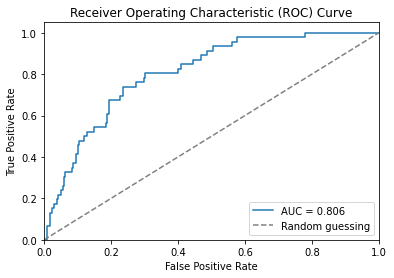

In [56]:
y_score = logreg.predict_proba(X_test)[:, 1] 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# y_true: true labels, y_score: predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='AUC = %0.3f' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random guessing')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [57]:
param_grid2 = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}
grid_search2 = GridSearchCV(LogisticRegression(), param_grid2, cv=5, scoring = 'f1')
grid_search2.fit(X_resampled2, y_resampled2)
best_params2 = grid_search2.best_params_
print("Best Hyperparameters:", best_params2)


Best Hyperparameters: {'C': 10, 'penalty': 'l2'}


In [58]:
logreg2 = LogisticRegression(**best_params2)

# Fit the logistic regression model to the entire training set
logreg2.fit(X_resampled2, y_resampled2)
y_pred_logreg2= logreg2.predict(X_test2)
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
print("Accuracy:", accuracy_score(y_test2, y_pred_logreg2))
print("F1:", f1_score(y_test2, y_pred_logreg2))
print("Precision:", precision_score(y_test2, y_pred_logreg2))
print("Recall:", recall_score(y_test2, y_pred_logreg2))
print("Roc Auc Score:", roc_auc_score(y_test2, y_pred_logreg2))



Accuracy: 0.8495327102803738
F1: 0.22222222222222224
Precision: 0.14285714285714285
Recall: 0.5
Roc Auc Score: 0.6826171875


+--------------------------------+----------------------+
|          Feature Name          |     Coefficient      |
+--------------------------------+----------------------+
|              age               |  1.734676126958362   |
|          hypertension          | -0.42660351984387324 |
|         heart_disease          | -0.5763907181706369  |
|       avg_glucose_level        | 0.26230499438094507  |
|            age_bmi             | 0.17704879107735041  |
|        ever_married_No         |  -4.845046765070857  |
|        ever_married_Yes        |  -4.221868149878378  |
|       work_type_Govt_job       |   -5.537746878103    |
|     work_type_Never_worked     | -2.3019472830545564  |
|       work_type_Private        |  -4.570363244135527  |
|    work_type_Self-employed     |  -5.106993846744263  |
|       work_type_children       | -3.2650453246359277  |
| smoking_status_formerly smoked | -5.4902044772818215  |
|  smoking_status_never smoked   |  -5.757445460776942  |
|     smoking_

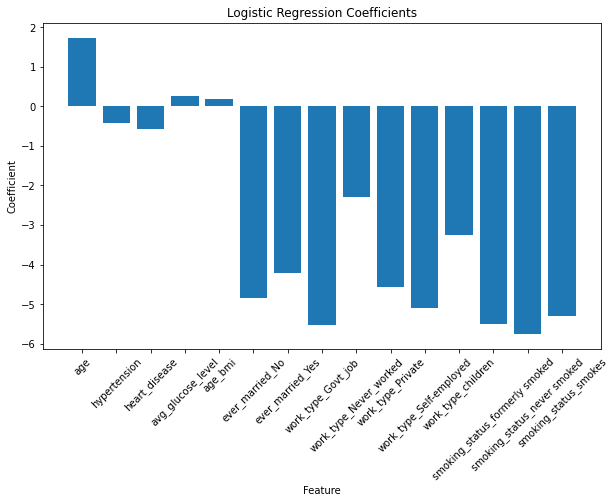

In [59]:
feature_names2 = X_resampled2.columns
coefficients2 = logreg2.coef_[0]
from prettytable import PrettyTable


table2 = PrettyTable()
table2.field_names = ['Feature Name', 'Coefficient']
for feature2, coef2 in zip(feature_names2, coefficients2):
    table2.add_row([feature2, coef2])

# Print the table
print(table2)

plt.figure(figsize=(10, 6))
plt.bar(feature_names2, coefficients2)
plt.xticks(feature_names2, rotation=45)
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Logistic Regression Coefficients')
plt.show()


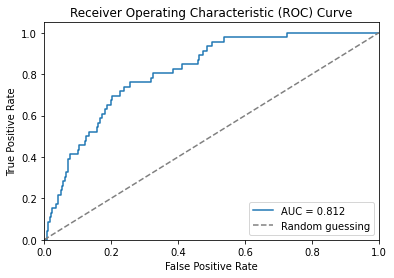

In [60]:
y_score2 = logreg2.predict_proba(X_test2)[:, 1] 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# y_true: true labels, y_score: predicted probabilities
fpr2, tpr2, thresholds2 = roc_curve(y_test2, y_score2)
roc_auc2 = auc(fpr2, tpr2)

plt.plot(fpr2, tpr2, label='AUC = %0.3f' % roc_auc2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random guessing')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [61]:
weights = np.linspace(0.0,0.99,200)
param_grid3 = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

grid_search3 = GridSearchCV(
    LogisticRegression(random_state = 42),
    param_grid=param_grid3,
    scoring = 'f1'
)


In [62]:
grid_search3.fit(X_resampled, y_resampled)


print('Best hyper parameters:', grid_search3.best_params_, 'Score', grid_search3.best_score_)

Best hyper parameters: {'class_weight': {0: 0.3532160804020101, 1: 0.6467839195979899}} Score 0.7712790889213614


In [63]:
logreg3 = LogisticRegression(random_state = 42, class_weight= {0: 0.32834170854271355, 1: 0.6716582914572864})
# Fit the logistic regression model to the entire training set
logreg3.fit(X_resampled, y_resampled)
y_pred_logreg3= logreg3.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
print("Accuracy:", accuracy_score(y_test, y_pred_logreg3))
print("F1:", f1_score(y_test, y_pred_logreg3))
print("Precision:", precision_score(y_test, y_pred_logreg3))
print("Recall:", recall_score(y_test, y_pred_logreg3))
print("Roc Auc Score:", roc_auc_score(y_test, y_pred_logreg3))

Accuracy: 0.8355140186915888
F1: 0.22807017543859645
Precision: 0.14285714285714285
Recall: 0.5652173913043478
Roc Auc Score: 0.7064368206521738


In [67]:
def get_model_results(classifier, model, x_train, y_train, x_test, y_test):
    # fit the model with data 
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print("Results for "+ classifier)
    print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
    print("Recall:", metrics.recall_score(y_test,y_pred))
    print("Precision:", metrics.precision_score(y_test,y_pred))
    print("F1 Score:", metrics.f1_score(y_test,y_pred))

    # confusion matrix 
    cfn_matrix = metrics.confusion_matrix(y_test,y_pred,labels=[1,0])
    print("\nConfusion Matrix:\n")
    print(cfn_matrix)

    # Classification Report 
    print("\nClassification Report:\n")

    print(classification_report(y_test, y_pred))
    
    accuracy = metrics.accuracy_score(y_test,y_pred)
    recall = metrics.recall_score(y_test,y_pred)
    precision = metrics.precision_score(y_test,y_pred)
    f1 = metrics.f1_score(y_test,y_pred)
    results = [accuracy, recall, precision, f1]

    print(results)
    # print the auc curve and show auc score 
    #plot roc curve 
    import matplotlib.pyplot as plt 
    # predicted probabilities of class 1 
    by_pred_prob_model = model.predict_proba(x_test)[:,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, by_pred_prob_model)
    auc = metrics.roc_auc_score(y_test, by_pred_prob_model)
    plt.plot(fpr,tpr,label=classifier+", auc ="+str("{:.3f}".format(auc)))
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random guessing')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.legend(loc=4)
    plt.show()
    ab_auc = auc
    print("AUC Score:" , ab_auc)


    return

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report 

Results for Logistic Regression 
Accuracy: 0.9205607476635514
Recall: 0.21739130434782608
Precision: 0.1694915254237288
F1 Score: 0.19047619047619047

Confusion Matrix:

[[ 10  36]
 [ 49 975]]

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1024
           1       0.17      0.22      0.19        46

    accuracy                           0.92      1070
   macro avg       0.57      0.58      0.57      1070
weighted avg       0.93      0.92      0.93      1070

[0.9205607476635514, 0.21739130434782608, 0.1694915254237288, 0.19047619047619047]


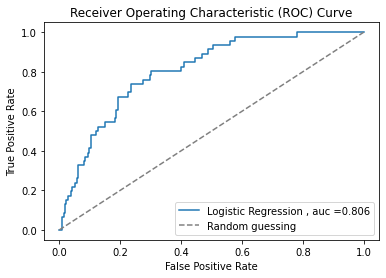

AUC Score: 0.8062160326086958


In [69]:
get_model_results("Logistic Regression ", logreg, X_resampled, y_resampled, X_test, y_test)

Results for Logistic Regression 
Accuracy: 0.8495327102803738
Recall: 0.5
Precision: 0.14285714285714285
F1 Score: 0.22222222222222224

Confusion Matrix:

[[ 23  23]
 [138 886]]

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      1024
           1       0.14      0.50      0.22        46

    accuracy                           0.85      1070
   macro avg       0.56      0.68      0.57      1070
weighted avg       0.94      0.85      0.89      1070

[0.8495327102803738, 0.5, 0.14285714285714285, 0.22222222222222224]


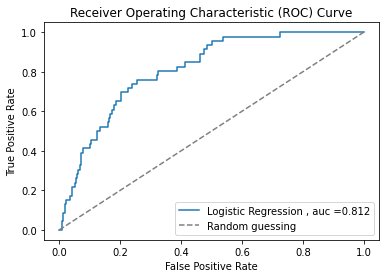

AUC Score: 0.8122877038043478


In [70]:
get_model_results("Logistic Regression ", logreg2, X_resampled2, y_resampled2, X_test2, y_test2)